In [2]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [22]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to C:\Users\Will
[nltk_data]     Jiang\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Will
[nltk_data]     Jiang\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [3]:
raw_data = pd.read_csv("tweets_v8.csv")
raw_data.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,source,is_retweet
0,the _ûndër-ratèd niggáh👊🏾,NaN,@ManUtd die hard❤️❤️💪🏿💪🏿\n\n\nYOLO\n\n\nJ'ai b...,2019-09-06 19:24:57+00:00,581,1035,8922,False,2021-10-06 12:05:38+00:00,When life hits and the same time poverty strik...,Twitter for Android,False
1,Best uncle on planet earth,NaN,NaN,2013-05-08 19:35:26+00:00,741,730,8432,False,2021-10-06 12:05:22+00:00,That marble episode of #SquidGame ruined me. 😭😭😭,Twitter for Android,False
2,marcie,NaN,animal crossing. chicken nuggets. baby yoda. s...,2009-02-21 10:31:30+00:00,562,1197,62732,False,2021-10-06 12:05:22+00:00,#Squidgame time,Twitter Web App,False
3,YoMo.Mdp,Any pronouns,Where the heck is the karma\nI'm going on my s...,2021-02-14 13:21:22+00:00,3,277,1341,False,2021-10-06 12:05:04+00:00,//Blood on 1st slide\nI'm joining the squidgam...,Twitter Web App,False
4,Laura Reactions,France,I talk and I make reactions videos about shows...,2018-12-19 20:38:28+00:00,330,152,2278,False,2021-10-06 12:05:00+00:00,"The two first games, players were killed by th...",Twitter Web App,False


# Cleaning text in tweets

In [4]:
raw_data['text'].head()

0    When life hits and the same time poverty strik...
1    That marble episode of #SquidGame  ruined me. 😭😭😭
2                                      #Squidgame time
3    //Blood on 1st slide\nI'm joining the squidgam...
4    The two first games, players were killed by th...
Name: text, dtype: object

In [5]:
raw_texts = raw_data['text']

In [6]:
print(raw_texts[1:30])

1     That marble episode of #SquidGame  ruined me. 😭😭😭
2                                       #Squidgame time
3     //Blood on 1st slide\nI'm joining the squidgam...
4     The two first games, players were killed by th...
5     $THG\nGoing to explode to 4B Marketcap very so...
6     @B_hundred_Hyun pls use that gun on me. 😩 \n\n...
7     Please vote in my daily poll. \nThanks. 😊\n\nD...
8     I've seen bi-lingual Korean speakers slam the ...
9     I discovered English audio after 5 episodes of...
10    The struggle is VERY real 👀 #SquidGame https:/...
11    — squid game (2021): deaths and foreshadowing ...
12    friendship gone wrong. friendship break-ups hu...
13    That's definitely the first thing I saw - Who'...
14    The saga continues \nGet data cheap  @honourwo...
15    naur she's just purely a cutie&lt;333  #squidg...
16    Dunno what everyone's going crazy about #Squid...
17    I finally finished #SquidGame last night and t...
18    #SquidGame\n\nIn the tug of war game, ever

In [7]:
num_hashtag = []
# count the number of hashtags
for i in range(len(raw_texts)):
    num_hashtag.append(raw_texts[i].count('#'))

In [8]:
raw_data['num_hashtag']=num_hashtag

In [9]:
# count the number of pics
num_pics = []
for i in range(len(raw_texts)):
    num_pics.append(raw_texts[i].count('t.co'))

In [10]:
raw_data['num_pics']=num_pics

In [12]:
raw_data.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,source,is_retweet,num_hashtag,num_pics
0,the _ûndër-ratèd niggáh👊🏾,NaN,@ManUtd die hard❤️❤️💪🏿💪🏿\n\n\nYOLO\n\n\nJ'ai b...,2019-09-06 19:24:57+00:00,581,1035,8922,False,2021-10-06 12:05:38+00:00,When life hits and the same time poverty strik...,Twitter for Android,False,2,1
1,Best uncle on planet earth,NaN,NaN,2013-05-08 19:35:26+00:00,741,730,8432,False,2021-10-06 12:05:22+00:00,That marble episode of #SquidGame ruined me. 😭😭😭,Twitter for Android,False,1,0
2,marcie,NaN,animal crossing. chicken nuggets. baby yoda. s...,2009-02-21 10:31:30+00:00,562,1197,62732,False,2021-10-06 12:05:22+00:00,#Squidgame time,Twitter Web App,False,1,0
3,YoMo.Mdp,Any pronouns,Where the heck is the karma\nI'm going on my s...,2021-02-14 13:21:22+00:00,3,277,1341,False,2021-10-06 12:05:04+00:00,//Blood on 1st slide\nI'm joining the squidgam...,Twitter Web App,False,1,1
4,Laura Reactions,France,I talk and I make reactions videos about shows...,2018-12-19 20:38:28+00:00,330,152,2278,False,2021-10-06 12:05:00+00:00,"The two first games, players were killed by th...",Twitter Web App,False,0,1


In [13]:
# remove extra white space
for i in range(len(raw_texts)):
    raw_texts[i] = re.sub("\s+"," ",raw_texts[i])

In [15]:
raw_data['clean_text'] = raw_texts

In [16]:
# remove hyperlinks
for i in range(len(raw_data['clean_text'])):
    raw_data['clean_text'][i] = re.sub(r'http\S+', "",raw_data['clean_text'][i])

In [17]:
# remove tags
for i in range(len(raw_data['clean_text'])):
    raw_data['clean_text'][i] = re.sub(r'@\S+', "",raw_data['clean_text'][i])

In [18]:
# lower case
for i in range(len(raw_data['clean_text'])):
    raw_data['clean_text'][i] = raw_data['clean_text'][i].lower()

In [23]:
# remove stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

for i in range(len(raw_data['clean_text'])):
    word_tokens = word_tokenize(raw_data['clean_text'][i])
    filtered_sentence = [w for w in word_tokens if w not in stop_words]
    raw_data['clean_text'][i] = " ".join(filtered_sentence)

In [24]:
# remove punctuation
for i in range(len(raw_data['clean_text'])):
    raw_data['clean_text'][i] = re.sub("[^A-Za-z ]", "",raw_data['clean_text'][i])

In [25]:
# stem words
from nltk.stem import PorterStemmer
porter=PorterStemmer()

def stemSentence(sentence):
    token_words=word_tokenize(sentence)
    token_words
    stem_sentence=[]
    for word in token_words:
        stem_sentence.append(porter.stem(word))
        stem_sentence.append(" ")
    return "".join(stem_sentence)

for i in range(len(raw_data['clean_text'])):
    raw_data['clean_text'][i] = stemSentence(raw_data['clean_text'][i])

In [26]:
print(raw_data['clean_text'][:30])

0     life hit time poverti strike gong yoo let play...
1                           marbl episod squidgam ruin 
2                                        squidgam time 
3     blood st slide m join squidgam thing m alreadi...
4     two first game player kill mask guy bloodi nig...
5     thg go explod b marketcap soon world first mob...
6         pl use gun baekhyun exo weareoneexo squidgam 
7     pleas vote daili poll thank think donni van de...
8     ve seen bilingu korean speaker slam squidgam t...
9     discov english audio episod squid game korean ...
10                               struggl real squidgam 
11    squid game death foreshadow major spoiler cw b...
12    friendship gone wrong friendship breakup hurt ...
13    s definit first thing saw s seen squidgam far ...
14    saga continu get data cheap messag us twitch s...
15                        naur s pure cuti lt squidgam 
16    dunno everyon s go crazi squidgam could email ...
17    final finish squidgam last night plot twis

In [28]:
# export cleaned data
raw_data.to_csv("tweets_data2.csv")

# More Data Cleaning - analysis from here

In [4]:
df = pd.read_csv("tweets_data2.csv")

In [5]:
df.rename(columns = {'Unnamed: 0':'index'},inplace=True)

In [6]:
df.head()

,index,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,source,is_retweet,num_hashtag,num_pics,clean_text
0,0,the _ûndër-ratèd niggáh👊🏾,NaN,@ManUtd die hard❤️❤️💪🏿💪🏿\n\n\nYOLO\n\n\nJ'ai b...,2019-09-06 19:24:57+00:00,581,1035,8922,False,2021-10-06 12:05:38+00:00,When life hits and the same time poverty strik...,Twitter for Android,False,2,1,life hit time poverti strike gong yoo let play...
1,1,Best uncle on planet earth,NaN,NaN,2013-05-08 19:35:26+00:00,741,730,8432,False,2021-10-06 12:05:22+00:00,That marble episode of #SquidGame ruined me. 😭😭😭,Twitter for Android,False,1,0,marbl episod squidgam ruin
2,2,marcie,NaN,animal crossing. chicken nuggets. baby yoda. s...,2009-02-21 10:31:30+00:00,562,1197,62732,False,2021-10-06 12:05:22+00:00,#Squidgame time,Twitter Web App,False,1,0,squidgam time
3,3,YoMo.Mdp,Any pronouns,Where the heck is the karma\nI'm going on my s...,2021-02-14 13:21:22+00:00,3,277,1341,False,2021-10-06 12:05:04+00:00,//Blood on 1st slide I'm joining the squidgame...,Twitter Web App,False,1,1,blood st slide join squidgam thing alreadi dea...
4,4,Laura Reactions,France,I talk and I make reactions videos about shows...,2018-12-19 20:38:28+00:00,330,152,2278,False,2021-10-06 12:05:00+00:00,"The two first games, players were killed by th...",Twitter Web App,False,0,1,two first game player kill mask guy bloodi nig...


In [6]:
df.shape

(80019, 16)

In [7]:
df.clean_text = df.clean_text.astype("str")
for i in range(len(df.clean_text)):
    df.clean_text[i] = df.clean_text[i].replace('squidgam ','')
    df.clean_text[i] = df.clean_text[i].replace('squidgamenetflix ','')
    df.clean_text[i] = df.clean_text[i].replace('nt ','')
    df.clean_text[i] = df.clean_text[i].replace('nft ','')

In [8]:
# transfrom date
df['dayofweek'] = pd.to_datetime(df['date']).apply(lambda x:x.dayofweek)
df['hour'] = pd.to_datetime(df['date']).apply(lambda x:x.hour)

In [9]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['dayofweek'] = df['dayofweek'].map(dmap)

In [10]:
df['date_only'] = pd.to_datetime(df['date']).apply(lambda x:x.strftime('%m-%d'))

In [11]:
df.head()

,index,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,source,is_retweet,num_hashtag,num_pics,clean_text,dayofweek,hour,date_only
0,0,the _ûndër-ratèd niggáh👊🏾,NaN,@ManUtd die hard❤️❤️💪🏿💪🏿\n\n\nYOLO\n\n\nJ'ai b...,2019-09-06 19:24:57+00:00,581,1035,8922,False,2021-10-06 12:05:38+00:00,When life hits and the same time poverty strik...,Twitter for Android,False,2,1,life hit time poverti strike gong yoo let play...,Wed,12,10-06
1,1,Best uncle on planet earth,NaN,NaN,2013-05-08 19:35:26+00:00,741,730,8432,False,2021-10-06 12:05:22+00:00,That marble episode of #SquidGame ruined me. 😭😭😭,Twitter for Android,False,1,0,marbl episod ruin,Wed,12,10-06
2,2,marcie,NaN,animal crossing. chicken nuggets. baby yoda. s...,2009-02-21 10:31:30+00:00,562,1197,62732,False,2021-10-06 12:05:22+00:00,#Squidgame time,Twitter Web App,False,1,0,time,Wed,12,10-06
3,3,YoMo.Mdp,Any pronouns,Where the heck is the karma\nI'm going on my s...,2021-02-14 13:21:22+00:00,3,277,1341,False,2021-10-06 12:05:04+00:00,//Blood on 1st slide I'm joining the squidgame...,Twitter Web App,False,1,1,blood st slide join thing alreadi dead sugar h...,Wed,12,10-06
4,4,Laura Reactions,France,I talk and I make reactions videos about shows...,2018-12-19 20:38:28+00:00,330,152,2278,False,2021-10-06 12:05:00+00:00,"The two first games, players were killed by th...",Twitter Web App,False,0,1,two first game player kill mask guy bloodi nig...,Wed,12,10-06


# EDA

In [12]:
df_trend = df.groupby('date_only').agg({'index':'count'}).reset_index()

In [13]:
df_trend.head()

,date_only,index
0,10-05,5576
1,10-06,10381
2,10-07,4043
3,10-10,6581
4,10-11,3419


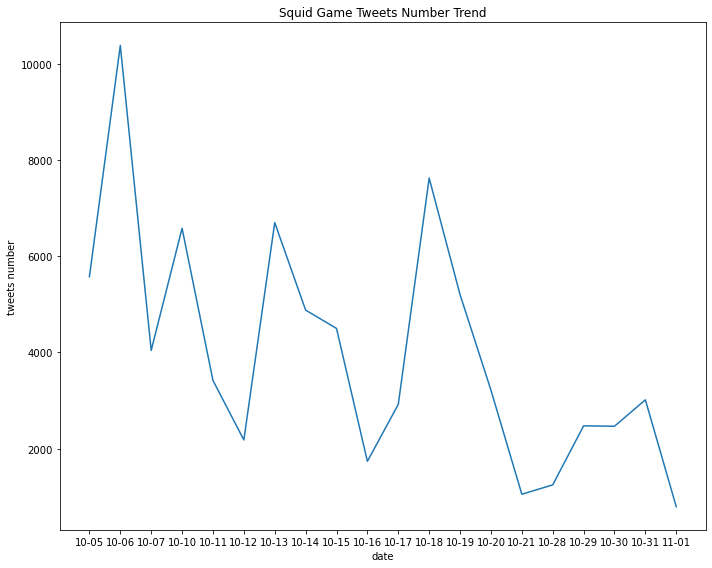

In [14]:
plt.figure(figsize=(10,8))
sns.lineplot(x='date_only',y='index',data=df_trend)
plt.title('Squid Game Tweets Number Trend')
plt.xlabel('date')
plt.ylabel('tweets number')
plt.tight_layout()

In [15]:
# total tweets trend
df_trend2 = df.groupby('dayofweek').agg({'index':'count'}).reset_index()

Text(0, 0.5, 'tweets number')

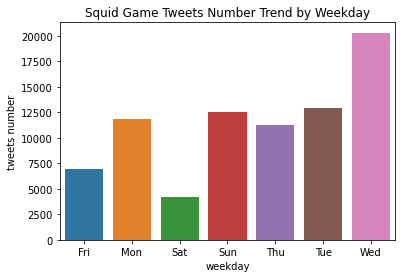

In [16]:
sns.barplot(x='dayofweek',y='index',data=df_trend2)
plt.title('Squid Game Tweets Number Trend by Weekday')
plt.xlabel('weekday')
plt.ylabel('tweets number')

In [17]:
non_col = ['user_description','user_created','user_name','text','clean_text']

In [18]:
for x in [x for x in df.columns if x not in non_col]:
    print('*',x)
    print(df[x].value_counts())

* index
0        1
53343    1
53350    1
53349    1
53348    1
        ..
26672    1
26671    1
26670    1
26669    1
80018    1
Name: index, Length: 80019, dtype: int64
* user_location
Los Angeles, CA    902
London, England    718
United States      698
India              675
USA                632
                  ... 
Tal'Dorei            1
your dreams.         1
Right Here           1
Raftel               1
Murcia Spain         1
Name: user_location, Length: 18235, dtype: int64
* user_followers
0         1410
1         1065
2          885
12         807
3          704
          ... 
6818         1
17252        1
190453       1
7236         1
6907         1
Name: user_followers, Length: 10098, dtype: int64
* user_friends
0        849
49       561
1        367
11       314
5        305
        ... 
6810       1
10665      1
10478      1
3417       1
15447      1
Name: user_friends, Length: 5497, dtype: int64
* user_favourites
0         1141
7          624
1          504
3          3

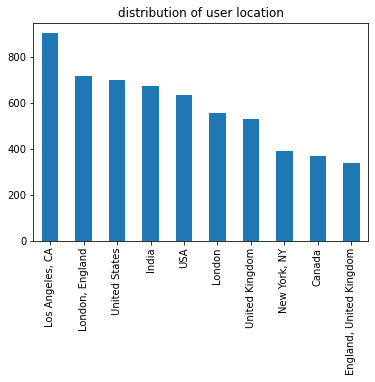

In [19]:
df['user_location'].value_counts()[:10].plot(kind='bar')
plt.title('distribution of user location')
plt.show()

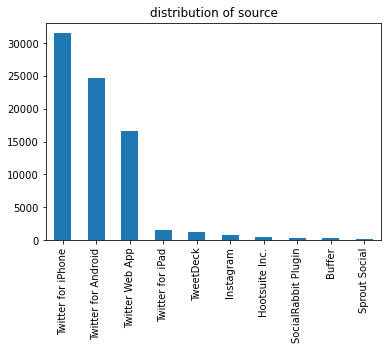

In [20]:
df['source'].value_counts()[:10].plot(kind='bar')
plt.title('distribution of source')
plt.show()

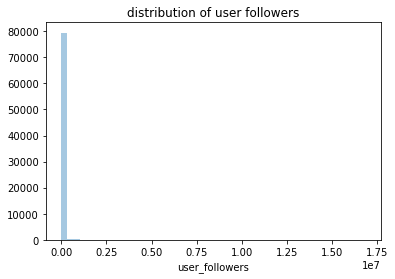

In [21]:
sns.distplot(df['user_followers'],kde=False)
plt.title('distribution of user followers')
plt.show()

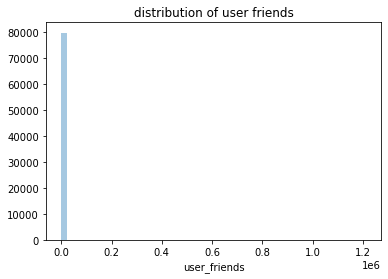

In [22]:
sns.distplot(df['user_friends'],kde=False)
plt.title('distribution of user friends')
plt.show()

# Word Count Analysis

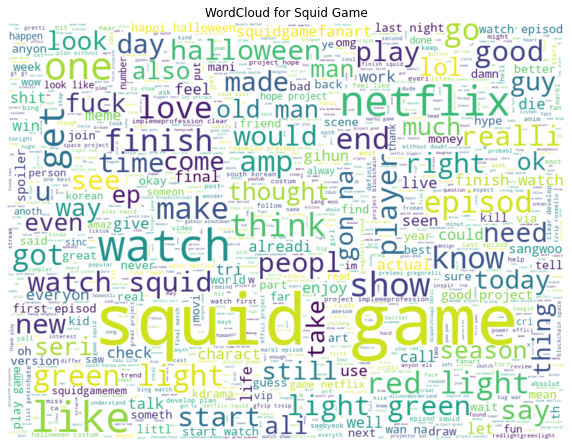

In [23]:
# word cloud
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud

# join all text in one
cloud = ' '.join([tweet for tweet in df['clean_text']])

# generate word clound
stop_words = set(stopwords.words('english'))
wc = WordCloud(background_color="white",max_words=1000, width=800,height=600,stopwords=stop_words).generate(cloud)

# plot
plt.figure(figsize=(10, 8))
plt.title('WordCloud for Squid Game')
plt.axis('off')
plt.imshow(wc, interpolation = 'bilinear')
plt.show()

In [24]:
# average word lenth
df['word_len'] = df['clean_text'].apply(len)

In [25]:
df['word_len']

0        60
1        18
2         5
3        59
4        65
         ..
80014    52
80015    52
80016    82
80017    33
80018    64
Name: word_len, Length: 80019, dtype: int64

In [26]:
df['word_len'].max()

217

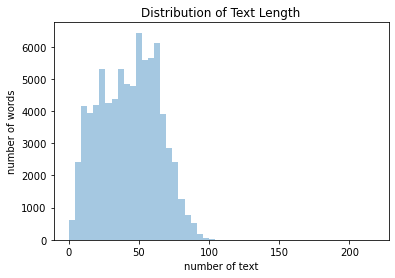

In [27]:
sns.distplot(x=df['word_len'],kde=False)
plt.title('Distribution of Text Length')
plt.xlabel('number of text')
plt.ylabel('number of words')
plt.show()

In [28]:
# Activate CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Count Vectorizer
vect = CountVectorizer()  
vects = vect.fit_transform(df['clean_text'].values.astype('U'))

In [29]:
# to df
td = pd.DataFrame(vects.todense())  
td.columns = vect.get_feature_names()

In [30]:
td.head()

,aa,aaa,aaaa,aaaaa,aaaaaaa,aaaaaaaa,aaaaaaaaa,aaaaaaaaaa,aaaaaaaaaaaaaa,aaaaaaaaaaaaaaaa,...,zulwini,zuma,zumba,zumbafit,zumbalov,zumo,zuwapay,zvainoita,zymrat,zzzzzzzzzzzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
term_document_matrix = td.T
term_document_matrix.columns = ['Doc '+str(i) for i in range(1, 80020)]
term_document_matrix['total_count'] = term_document_matrix.sum(axis=1)

In [32]:
term_document_matrix.head()

,Doc 1,Doc 2,Doc 3,Doc 4,Doc 5,Doc 6,Doc 7,Doc 8,Doc 9,Doc 10,...,Doc 80011,Doc 80012,Doc 80013,Doc 80014,Doc 80015,Doc 80016,Doc 80017,Doc 80018,Doc 80019,total_count
aa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
aaa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
aaaa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
aaaaa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
aaaaaaa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [33]:
term_document_sub = term_document_matrix['total_count'].sort_values(ascending=False) 

In [34]:
term_document_sub = pd.DataFrame(term_document_sub).reset_index()

In [35]:
term_document_sub.head()

,index,total_count
0,game,17083
1,squid,12925
2,watch,9378
3,netflix,5375
4,episod,5083


In [36]:
# Top 25 words 
term_document_sub[:26]

,index,total_count
0,game,17083
1,squid,12925
2,watch,9378
3,netflix,5375
4,episod,5083
5,like,4378
6,project,4177
7,show,3626
8,one,3342
9,get,3165


Text(0, 0.5, 'key word')

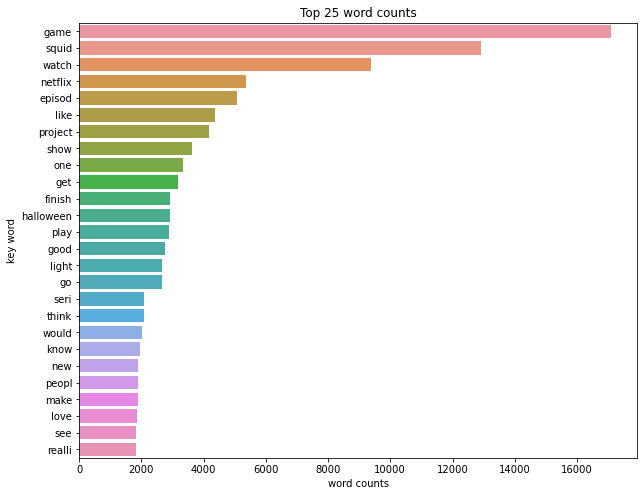

In [37]:
plt.figure(figsize=(10,8))
sns.barplot(x='total_count',y='index',data=term_document_sub[:26])
plt.title('Top 25 word counts')
plt.xlabel('word counts')
plt.ylabel('key word')

# Word Co-occurrence Analysis

In [38]:
del term_document_matrix['total_count']

In [39]:
term_document_matrix.head()

,Doc 1,Doc 2,Doc 3,Doc 4,Doc 5,Doc 6,Doc 7,Doc 8,Doc 9,Doc 10,...,Doc 80010,Doc 80011,Doc 80012,Doc 80013,Doc 80014,Doc 80015,Doc 80016,Doc 80017,Doc 80018,Doc 80019
aa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aaa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aaaa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aaaaa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aaaaaaa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
def cooccur(x):
    co = term_document_matrix.loc[x].T.dot(term_document_matrix.T)/term_document_matrix.loc[x].T.dot(term_document_matrix.T).max()
    return co.sort_values(ascending=False).head(20)

In [41]:
term_document_matrix.index.values

array(['aa', 'aaa', 'aaaa', ..., 'zvainoita', 'zymrat', 'zzzzzzzzzzzz'],
      dtype=object)

In [42]:
cooccur('netflix')

netflix    1.000000
game       0.356189
squid      0.321246
watch      0.144882
seri       0.127411
show       0.112906
million    0.070875
korean     0.055546
hit        0.053074
biggest    0.048953
becom      0.042195
launch     0.038899
ever       0.036921
like       0.032636
new        0.030493
popular    0.029834
episod     0.029669
get        0.025218
one        0.024229
tv         0.023076
Name: netflix, dtype: float64

In [43]:
cooccur('korean')

korean     1.000000
game       0.273114
squid      0.224453
netflix    0.204988
watch      0.197080
south      0.176399
seri       0.134428
show       0.127737
drama      0.102798
english    0.077859
like       0.055353
subtitl    0.046837
popular    0.042579
hit        0.041971
know       0.038929
dub        0.038321
peopl      0.037713
tv         0.034672
becom      0.034672
one        0.034063
Name: korean, dtype: float64

In [45]:
cooccur('realli')

realli     1.000000
watch      0.161208
game       0.150461
project    0.129478
good       0.123337
squid      0.115660
like       0.095701
episod     0.091607
show       0.073695
finish     0.068577
enjoy      0.066018
think      0.056295
hope       0.050665
love       0.046059
get        0.043501
one        0.042989
go         0.040942
man        0.036847
netflix    0.035824
end        0.035312
Name: realli, dtype: float64

In [46]:
cooccur('halloween')

halloween          1.000000
happi              0.173891
costum             0.159696
game               0.148289
squid              0.117871
year               0.049937
dress              0.036502
happyhalloween     0.034221
light              0.032953
everyon            0.032953
halloweencostum    0.032953
go                 0.032193
netflix            0.031432
like               0.029404
red                0.025095
play               0.023067
readi              0.021800
na                 0.021546
outfit             0.021546
get                0.020532
Name: halloween, dtype: float64

In [47]:
cooccur('light')

light        1.000000
red          0.492286
green        0.478441
game         0.130934
play         0.103837
squid        0.065269
doll         0.043117
kid          0.025910
halloween    0.025712
watch        0.024130
netflix      0.022350
like         0.019976
get          0.019778
would        0.019581
episod       0.018196
fan          0.017405
go           0.014636
never        0.014043
let          0.013449
one          0.013054
Name: light, dtype: float64

# Sentimental Analysis

In [68]:
from textblob import TextBlob

In [69]:
def polarity(text):
    testimonial = TextBlob(text)
    polarity = testimonial.sentiment.polarity
    return polarity


def subjectivity(text):
    testimonial = TextBlob(text)
    subjectivity = testimonial.subjectivity
    return subjectivity


def senti(text, polarity_threshold=0.0):
    testimonial = TextBlob(text)
    senti = testimonial.sentiment.polarity
    
    if senti > polarity_threshold:
        return 'Positive'
    elif np.abs(senti) == polarity_threshold:
        return 'Neutral'
    else:
        return 'Negative'

In [70]:
df['polarity'] = df['clean_text'].apply(lambda x: polarity(x))
df['subjectivity'] = df['clean_text'].apply(lambda x: subjectivity(x))
df['sentiment'] = df['clean_text'].apply(lambda x: senti(x))

In [71]:
df.head()

,index,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,...,num_hashtag,num_pics,clean_text,dayofweek,hour,date_only,word_len,polarity,subjectivity,sentiment
0,0,the _ûndër-ratèd niggáh👊🏾,NaN,@ManUtd die hard❤️❤️💪🏿💪🏿\n\n\nYOLO\n\n\nJ'ai b...,2019-09-06 19:24:57+00:00,581,1035,8922,False,2021-10-06 12:05:38+00:00,...,2,1,life hit time poverti strike gong yoo let play...,Wed,12,10-06,60,-0.4000,0.400000,Negative
1,1,Best uncle on planet earth,NaN,NaN,2013-05-08 19:35:26+00:00,741,730,8432,False,2021-10-06 12:05:22+00:00,...,1,0,marbl episod ruin,Wed,12,10-06,18,0.0000,0.000000,Neutral
2,2,marcie,NaN,animal crossing. chicken nuggets. baby yoda. s...,2009-02-21 10:31:30+00:00,562,1197,62732,False,2021-10-06 12:05:22+00:00,...,1,0,time,Wed,12,10-06,5,0.0000,0.000000,Neutral
3,3,YoMo.Mdp,Any pronouns,Where the heck is the karma\nI'm going on my s...,2021-02-14 13:21:22+00:00,3,277,1341,False,2021-10-06 12:05:04+00:00,...,1,1,blood st slide join thing alreadi dead sugar h...,Wed,12,10-06,59,-0.2000,0.400000,Negative
4,4,Laura Reactions,France,I talk and I make reactions videos about shows...,2018-12-19 20:38:28+00:00,330,152,2278,False,2021-10-06 12:05:00+00:00,...,0,1,two first game player kill mask guy bloodi nig...,Wed,12,10-06,65,-0.1375,0.283333,Negative


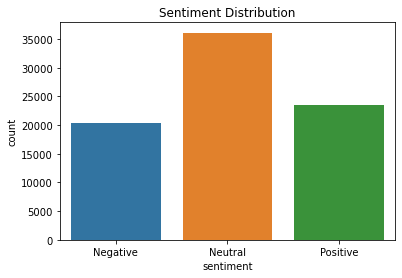

In [72]:
sns.countplot(x='sentiment', data=df)
plt.title('Sentiment Distribution')
plt.show()

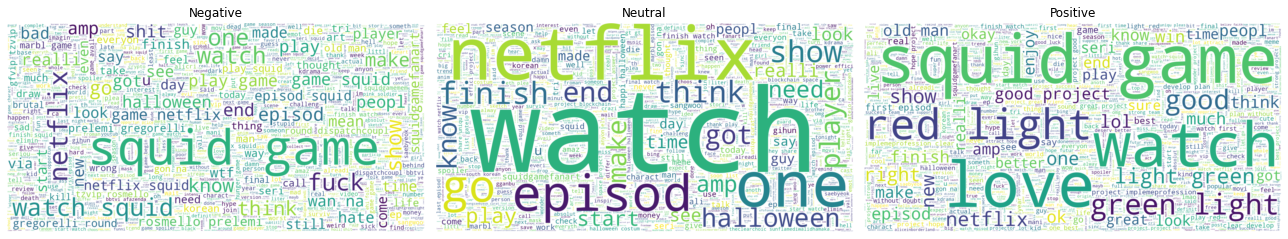

In [73]:
fig, ax = plt.subplots(1, 3, figsize=(18, 8))
sentiments = df['sentiment'].unique()
for i, senti in enumerate(sentiments):
    senti_df = df.query('sentiment==@senti')
    cloud = ' '.join([tweet for tweet in senti_df['clean_text']])
    wc = WordCloud(background_color="white",max_words=2000, width=1600,height=800).generate(cloud)

    ax[i].set_title(senti)
    ax[i].axis('off')
    ax[i].imshow(wc , interpolation = 'bilinear')
    
plt.tight_layout()
plt.show()